___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start_date = datetime.date(2010, 1, 1)
end_date = datetime.date(2020, 12, 31)

In [25]:
BAC = data.DataReader("BAC", 'stooq', start_date, end_date)

In [15]:
C = data.DataReader("C", 'stooq', start_date, end_date)
C

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,59.299,60.452,59.161,60.267,12789773.0
2020-12-30,59.533,59.880,59.299,59.485,11019772.0
2020-12-29,59.768,60.013,59.181,59.533,11050141.0
2020-12-28,59.251,60.531,59.124,59.748,14747891.0
2020-12-24,59.553,59.710,58.527,59.201,6982184.0
...,...,...,...,...,...
2010-01-08,31.646,31.821,30.432,31.125,71878146.0
2010-01-07,31.993,32.079,31.300,31.646,77406305.0
2010-01-06,30.865,31.905,30.432,31.561,77606570.0


In [8]:
GS = data.DataReader("GS", 'stooq', start_date, end_date)
MS = data.DataReader("MS", 'stooq', start_date, end_date)
JPM = data.DataReader("JPM", 'stooq', start_date, end_date)
WFC = data.DataReader("WFC", 'stooq', start_date, end_date)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [9]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [50]:
def get_var(var_name, all_vars):
   return all_vars['var_name']

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,29.585,29.959,29.476,29.881,29128656.0
2020-12-30,29.575,29.792,29.516,29.556,26749058.0
2020-12-29,29.743,29.821,29.506,29.585,33770247.0
2020-12-28,29.802,30.113,29.561,29.703,33333358.0
2020-12-24,29.841,29.841,29.319,29.536,22957475.0
...,...,...,...,...,...
2010-01-08,14.693,14.798,14.390,14.520,253977381.0
2010-01-07,14.435,14.864,14.289,14.652,369751412.0
2010-01-06,14.025,14.312,13.870,14.182,236719587.0


In [55]:
stock_list = map(lambda ticker : globals()[ticker], tickers)
#list(stock_list)

In [56]:
all_stocks = pd.concat(list(stock_list),axis=1,keys=tickers)

BAC                                            C          \
              Open    High     Low   Close       Volume    Open    High   
Date                                                                      
2010-01-04  13.186  13.628  13.085  13.575  208427072.0  29.131  29.565   
2010-01-05  13.619  14.025  13.584  14.019  241415168.0  29.654  30.779   
2010-01-06  14.025  14.312  13.870  14.182  236719587.0  30.865  31.905   
2010-01-07  14.435  14.864  14.289  14.652  369751412.0  31.993  32.079   
2010-01-08  14.693  14.798  14.390  14.520  253977381.0  31.646  31.821   

                                        ...      MS                          \
               Low   Close      Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2010-01-04  28.961  29.476  46859732.0  ...  25.282  26.325  25.222  25.452   
2010-01-05  29.565  30.605  76949168.0  ...  25.539  26.459  25.469  26.384   
2010-01-06  30.432  31.561  77606570.0  ...  26.325  26.835  26.178  26.722   
2010-01-07  31.300  31.646  77406305.0  ...  26.730  27.398  26.572  27.109   
2010-01-08  30.432  31.125  71878146.0  ...  26.843  27.028  26.334  26.554   

                           WFC                                      
                Volume    Open    High     Low   Close      Volume  
Date                                                                
2010-01-04  24742218.0  19.979  20.318  19.830  20.200  53154366.0  
2010-01-05  27352366.0  20.151  20.882  20.143  20.757  74929658.0  
2010-01-06  20680996.0  20.726  20.947  20.550  20.785  44949104.0  
2010-01-07  22700722.0  20.792  21.760  20.647  21.538  83336087.0  
2010-01-08  19424247.0  21.370  21.702  21.150  21.338  48020780.0  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [59]:
all_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [60]:
all_stocks.head()

Bank Ticker     BAC                                            C          \
Stock Info     Open    High     Low   Close       Volume    Open    High   
Date                                                                       
2010-01-04   13.186  13.628  13.085  13.575  208427072.0  29.131  29.565   
2010-01-05   13.619  14.025  13.584  14.019  241415168.0  29.654  30.779   
2010-01-06   14.025  14.312  13.870  14.182  236719587.0  30.865  31.905   
2010-01-07   14.435  14.864  14.289  14.652  369751412.0  31.993  32.079   
2010-01-08   14.693  14.798  14.390  14.520  253977381.0  31.646  31.821   

Bank Ticker                              ...      MS                          \
Stock Info      Low   Close      Volume  ...    Open    High     Low   Close   
Date                                     ...                                   
2010-01-04   28.961  29.476  46859732.0  ...  25.282  26.325  25.222  25.452   
2010-01-05   29.565  30.605  76949168.0  ...  25.539  26.459  25.469  26.384   
2010-01-06   30.432  31.561  77606570.0  ...  26.325  26.835  26.178  26.722   
2010-01-07   31.300  31.646  77406305.0  ...  26.730  27.398  26.572  27.109   
2010-01-08   30.432  31.125  71878146.0  ...  26.843  27.028  26.334  26.554   

Bank Ticker                 WFC                                      
Stock Info       Volume    Open    High     Low   Close      Volume  
Date                                                                 
2010-01-04   24742218.0  19.979  20.318  19.830  20.200  53154366.0  
2010-01-05   27352366.0  20.151  20.882  20.143  20.757  74929658.0  
2010-01-06   20680996.0  20.726  20.947  20.550  20.785  44949104.0  
2010-01-07   22700722.0  20.792  21.760  20.647  21.538  83336087.0  
2010-01-08   19424247.0  21.370  21.702  21.150  21.338  48020780.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [65]:
all_stocks.xs('Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     34.218
C       76.953
GS     260.530
JPM    132.820
MS      67.396
WFC     58.636
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

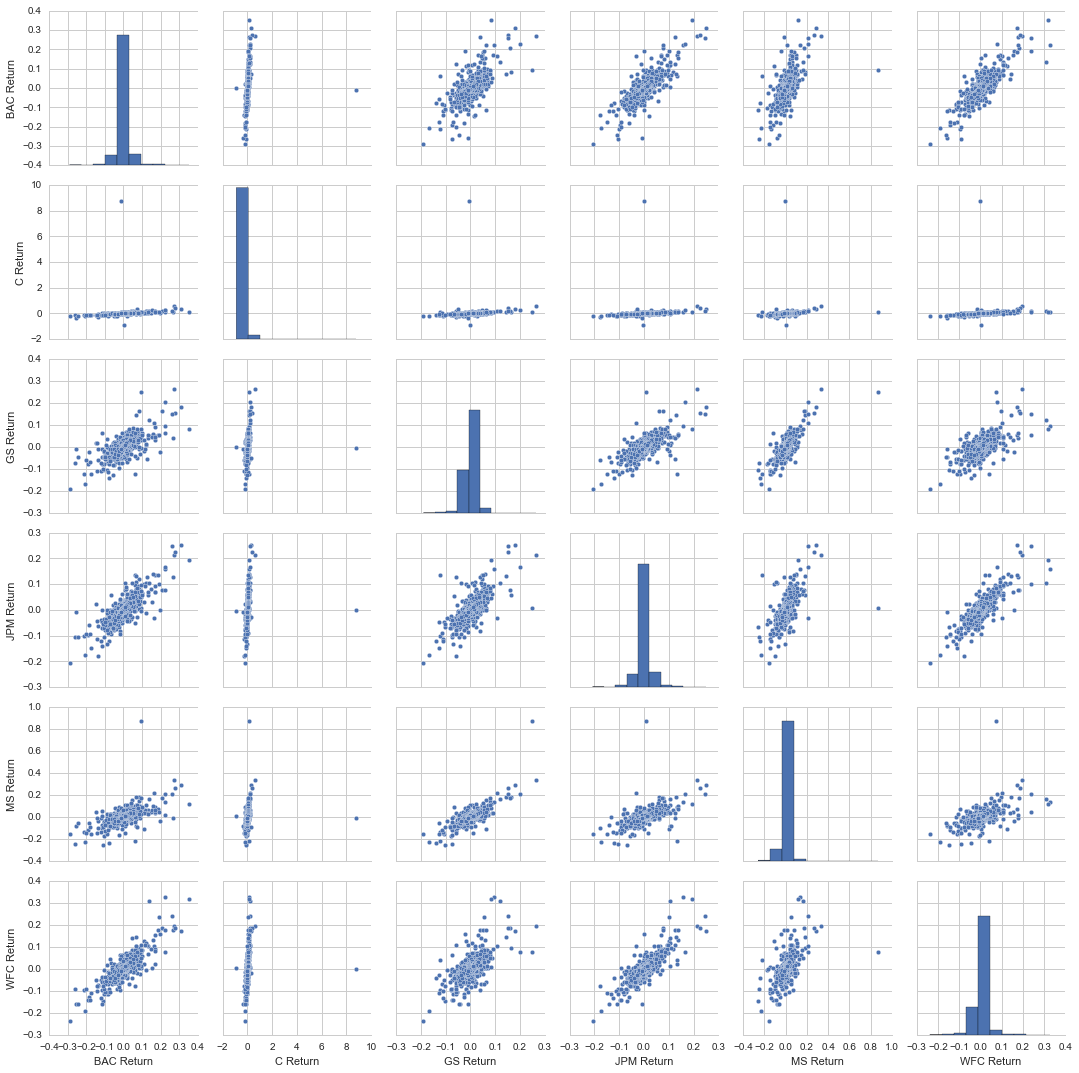

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



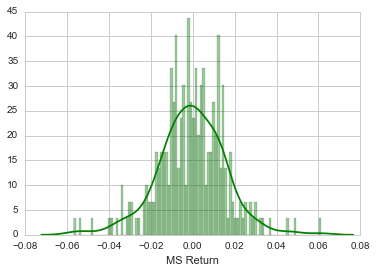

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



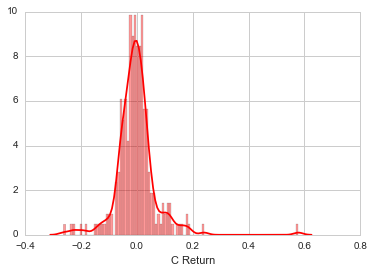

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
# import plotly
# import cufflinks as cf
# cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

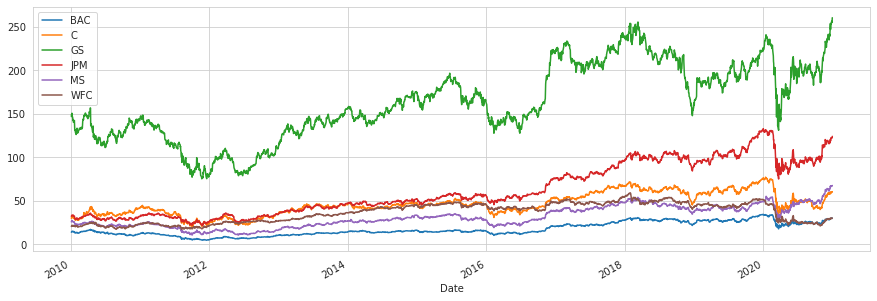

In [72]:
for ticker in tickers:
    all_stocks[ticker]['Close'].plot(figsize=(15,5), label=ticker)
    
plt.legend()

<AxesSubplot:xlabel='Date'>

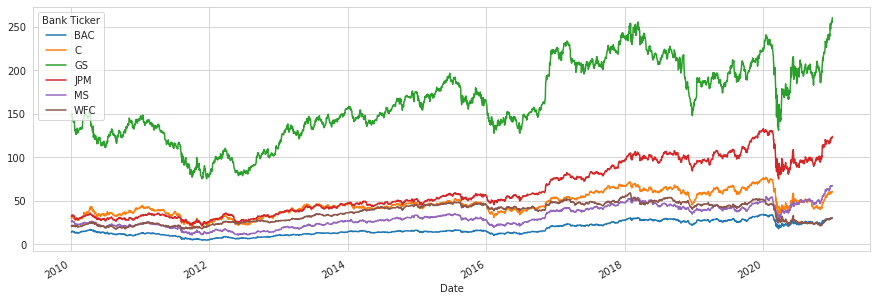

In [74]:
all_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(15,5))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [76]:
all_stocks.head()

Bank Ticker     BAC                                            C          \
Stock Info     Open    High     Low   Close       Volume    Open    High   
Date                                                                       
2010-01-04   13.186  13.628  13.085  13.575  208427072.0  29.131  29.565   
2010-01-05   13.619  14.025  13.584  14.019  241415168.0  29.654  30.779   
2010-01-06   14.025  14.312  13.870  14.182  236719587.0  30.865  31.905   
2010-01-07   14.435  14.864  14.289  14.652  369751412.0  31.993  32.079   
2010-01-08   14.693  14.798  14.390  14.520  253977381.0  31.646  31.821   

Bank Ticker                              ...      MS                          \
Stock Info      Low   Close      Volume  ...    Open    High     Low   Close   
Date                                     ...                                   
2010-01-04   28.961  29.476  46859732.0  ...  25.282  26.325  25.222  25.452   
2010-01-05   29.565  30.605  76949168.0  ...  25.539  26.459  25.469  26.384   
2010-01-06   30.432  31.561  77606570.0  ...  26.325  26.835  26.178  26.722   
2010-01-07   31.300  31.646  77406305.0  ...  26.730  27.398  26.572  27.109   
2010-01-08   30.432  31.125  71878146.0  ...  26.843  27.028  26.334  26.554   

Bank Ticker                 WFC                                      
Stock Info       Volume    Open    High     Low   Close      Volume  
Date                                                                 
2010-01-04   24742218.0  19.979  20.318  19.830  20.200  53154366.0  
2010-01-05   27352366.0  20.151  20.882  20.143  20.757  74929658.0  
2010-01-06   20680996.0  20.726  20.947  20.550  20.785  44949104.0  
2010-01-07   22700722.0  20.792  21.760  20.647  21.538  83336087.0  
2010-01-08   19424247.0  21.370  21.702  21.150  21.338  48020780.0  

[5 rows x 30 columns]

In [82]:
boa_open = all_stocks.xs(key=('BAC', 'Open'),axis=1)
boa_open.head()

Date
2010-01-04    13.186
2010-01-05    13.619
2010-01-06    14.025
2010-01-07    14.435
2010-01-08    14.693
Name: (BAC, Open), dtype: float64

In [109]:
# plt.figure(figsize=(20,8))
print(f'start date={start_date}')
# all_stocks.head()
BAC.head()
# BAC['Close'].loc[end_date: start_date  ].head()

# BAC['Close'].loc['2015-12-31':'2010-01-01'].head()
# BAC['Close'].loc[start_date:end_date].rolling(window=30).mean().plot(label='30 Day Avg')
# BAC['Close'].plot(label='BAC CLOSE')
# plt.legend()



start date=2010-01-01


,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,29.585,29.959,29.476,29.881,29128656.0
2020-12-30,29.575,29.792,29.516,29.556,26749058.0
2020-12-29,29.743,29.821,29.506,29.585,33770247.0
2020-12-28,29.802,30.113,29.561,29.703,33333358.0
2020-12-24,29.841,29.841,29.319,29.536,22957475.0


** Create a heatmap of the correlation between the stocks Close Price.**

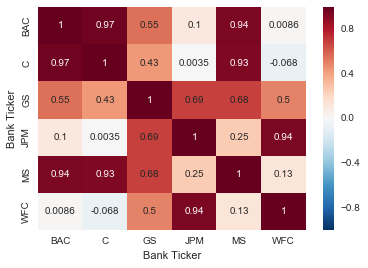

** Optional: Use seaborn's clustermap to cluster the correlations together:**

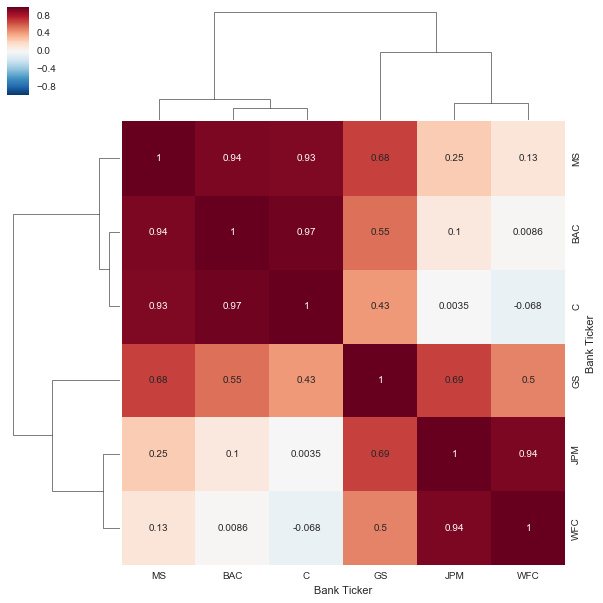

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.